In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Veri setini yükleme
data = pd.read_csv('C:/Users/VOLKAN/Desktop/winemag-data_first150k.csv')

In [3]:
# Veri setindeki sütun bilgilerini kontrol edelim
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
None


In [4]:
# İlk birkaç satırı görüntüleme
print(data.head())

   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               

In [5]:
# Temel istatistikler
print(data.describe())

          Unnamed: 0         points          price
count  150930.000000  150930.000000  137235.000000
mean    75464.500000      87.888418      33.131482
std     43569.882402       3.222392      36.322536
min         0.000000      80.000000       4.000000
25%     37732.250000      86.000000      16.000000
50%     75464.500000      88.000000      24.000000
75%    113196.750000      90.000000      40.000000
max    150929.000000     100.000000    2300.000000


In [6]:
# İlk 1000 veriyi seçelim
data = data.iloc[:1000]

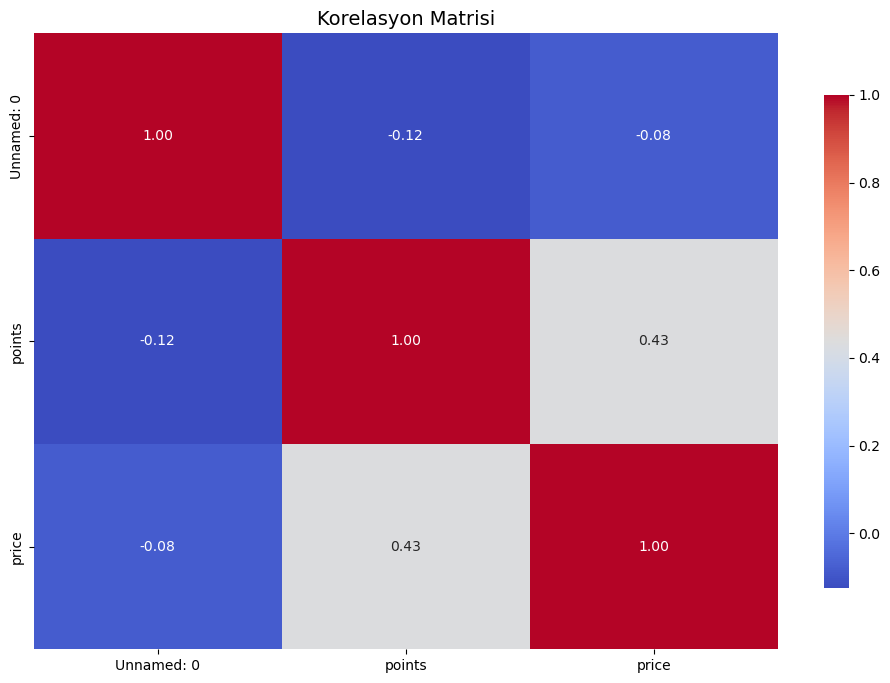

In [7]:
# Veri dağılımını görselleştirme (Heatmap)
plt.figure(figsize=(12, 8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Korelasyon Matrisi', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [8]:
# Eksik değerleri kontrol etme
print(data.isnull().sum())

Unnamed: 0       0
country          0
description      0
designation    235
points           0
price           45
province         0
region_1       142
region_2       543
variety          0
winery           0
dtype: int64


In [9]:
# Eksik verileri kontrol edelim ve temizleyelim
data = data.dropna()  

In [10]:
# Hedef değişkeni belirleme ("points" sütununu hedef olarak seçiyoruz)
X = data.drop(['points'], axis=1)
y = data['points']

In [11]:
# Kategorik sütunları sayısallaştırma
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [12]:
# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Algoritmaların karşılaştırılması
algorithms = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

results = {}
for name, model in algorithms.items():
    # Modeli eğitme
    model.fit(X_train, y_train)
    # Tahmin yapma
    y_pred = model.predict(X_test)
    # Performans ölçümleri
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }
    print(f"{name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")

Random Forest - MAE: 1.2231343283582095, MSE: 2.663858208955223, RMSE: 1.6321330242830157, R2: 0.5233934037465128
Linear Regression - MAE: 1.5926060154922772, MSE: 3.6034037938593153, RMSE: 1.8982633626184, R2: 0.35529375724852674
Decision Tree - MAE: 1.044776119402985, MSE: 3.074626865671642, RMSE: 1.7534613955464322, R2: 0.449900358708649
K-Nearest Neighbors - MAE: 1.853731343283582, MSE: 4.604776119402985, RMSE: 2.145874208662517, R2: 0.1761323236349145


In [15]:
# Sonuçları tablo şeklinde gösterme
results_df = pd.DataFrame(results).T
print("\nModel Performans Karşılaştırması:")
print(results_df)


Model Performans Karşılaştırması:
                          MAE       MSE      RMSE        R2
Random Forest        1.223134  2.663858  1.632133  0.523393
Linear Regression    1.592606  3.603404  1.898263  0.355294
Decision Tree        1.044776  3.074627  1.753461  0.449900
K-Nearest Neighbors  1.853731  4.604776  2.145874  0.176132


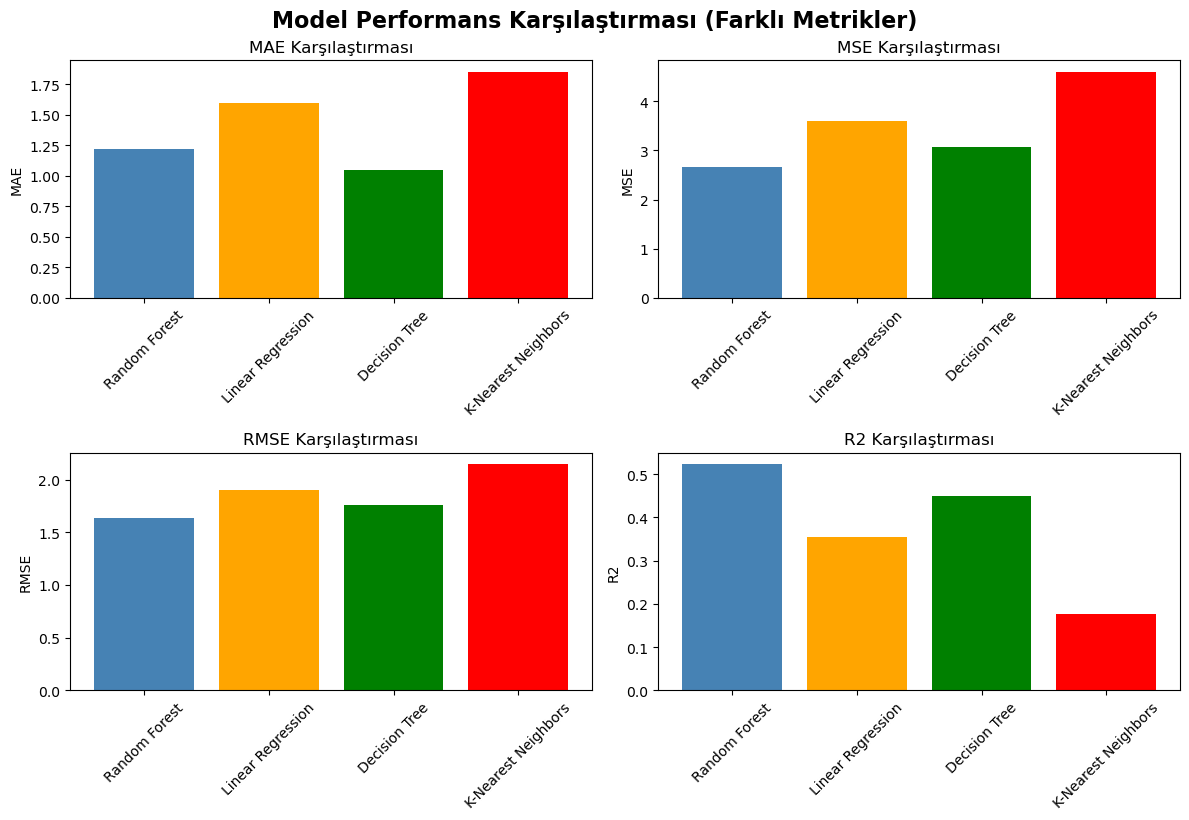

In [16]:
# Grafik performans karşılaştırmasını iyileştirme ve model metriklerini seçme
plt.figure(figsize=(12, 8))

# Farklı metrikler için birden fazla alt grafik oluşturma
metrics = ["MAE", "MSE", "RMSE", "R2"]
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.bar(results_df.index, results_df[metric], color=['steelblue', 'orange', 'green', 'red'])
    plt.title(f"{metric} Karşılaştırması")
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Model Performans Karşılaştırması (Farklı Metrikler)", y=1.02, fontsize=16, fontweight="bold")
plt.show()


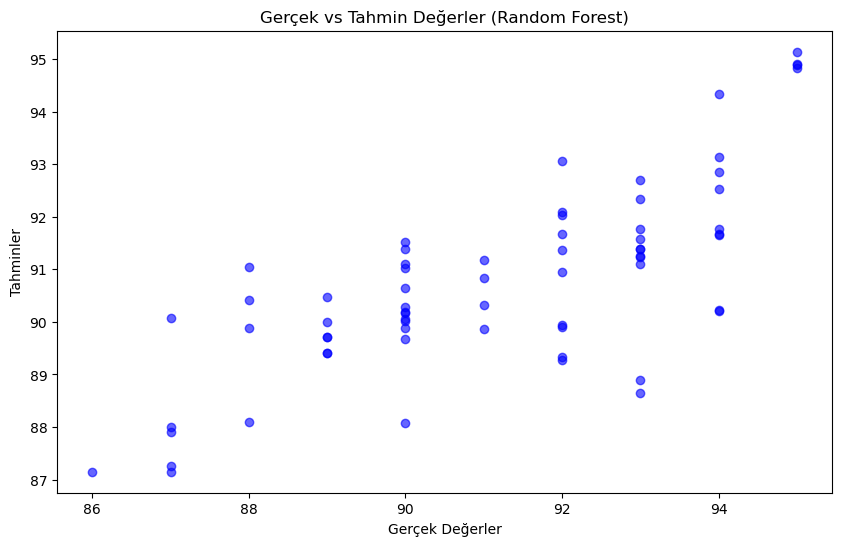

In [17]:
# Tahminleri görselleştirme (Random Forest örneği)
plt.figure(figsize=(10, 6))
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Scatter plot
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='b')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Gerçek vs Tahmin Değerler (Random Forest)")
plt.show()

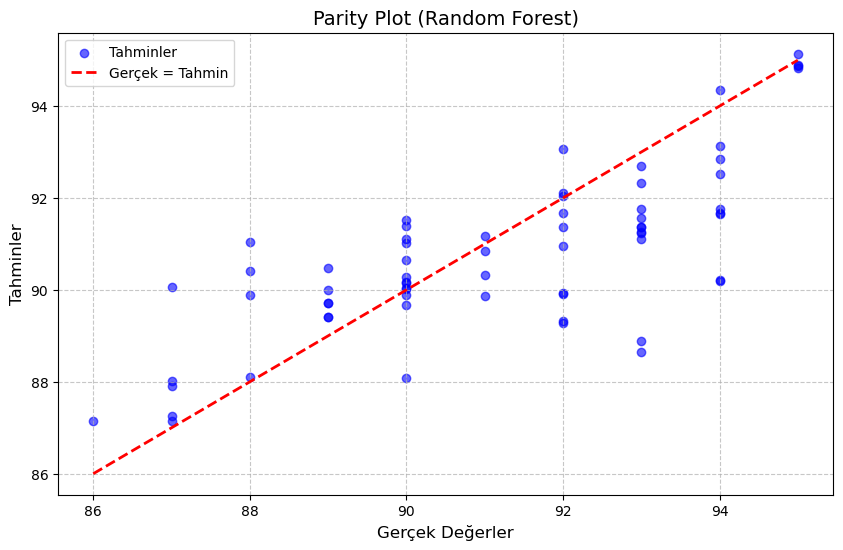

In [18]:
# Parity Plot (Random Forest Tahmin Performansı)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Gerçek = Tahmin')
plt.xlabel('Gerçek Değerler', fontsize=12)
plt.ylabel('Tahminler', fontsize=12)
plt.title('Parity Plot (Random Forest)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

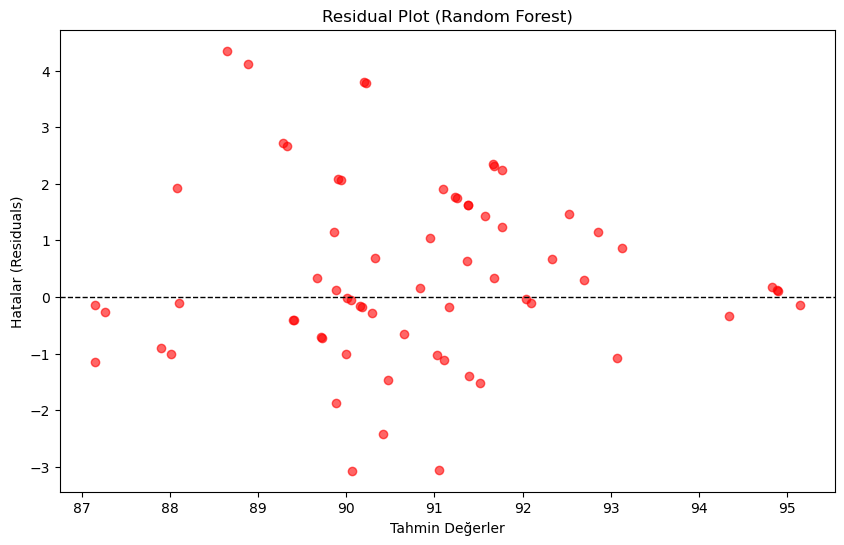

In [19]:
# Residual plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.6, color='r')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Tahmin Değerler")
plt.ylabel("Hatalar (Residuals)")
plt.title("Residual Plot (Random Forest)")
plt.show()

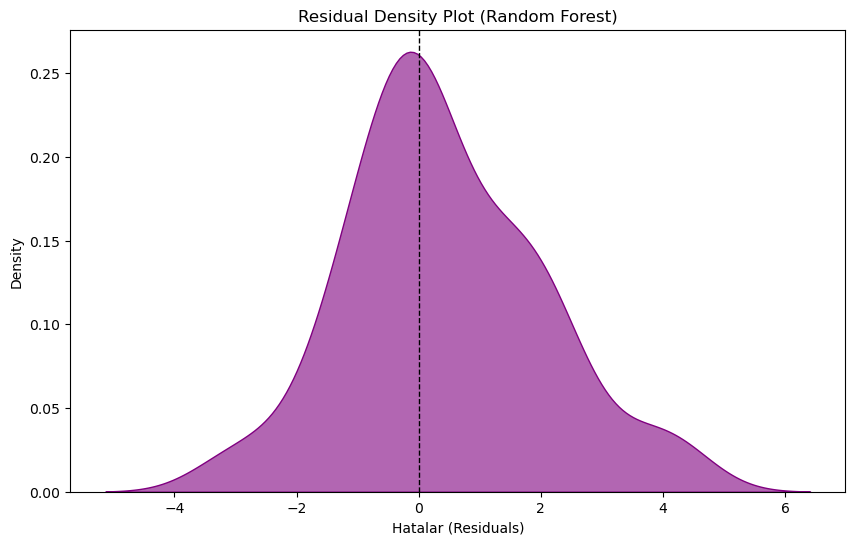

In [20]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, fill=True, color='purple', alpha=0.6)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Hatalar (Residuals)")
plt.title("Residual Density Plot (Random Forest)")
plt.show()

In [21]:
# Cross-validation uygulama
cv_metrics = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2', 'neg_root_mean_squared_error']
cv_results = {}

for metric in cv_metrics:
    cv_scores = cross_val_score(RandomForestRegressor(random_state=42), X_train, y_train, cv=5, scoring=metric)
    if 'neg' in metric:
        cv_scores = -cv_scores
    mean_score = cv_scores.mean()
    std_score = cv_scores.std()
    metric_name = metric.replace('neg_', '').upper()
    if metric_name == 'MEAN_SQUARED_ERROR':
        cv_results['MSE'] = {
            "Mean": mean_score,
            "Std": std_score
        }
    elif metric_name == 'ROOT_MEAN_SQUARED_ERROR':
        metric_name = 'RMSE'
        cv_results[metric_name] = {
            "Mean": mean_score,
            "Std": std_score
        }
    else:
        cv_results[metric_name] = {
            "Mean": mean_score,
            "Std": std_score
        }
    print(f"Cross-validation {metric_name} scores: {cv_scores}")
    print(f"Mean {metric_name}: {mean_score} ± {std_score}")

cv_results_df = pd.DataFrame(cv_results).T
print("\nCross-validation Performans Karşılaştırması:")
print(cv_results_df)

Cross-validation MEAN_ABSOLUTE_ERROR scores: [0.97018519 1.24166667 0.92296296 1.09       0.93113208]
Mean MEAN_ABSOLUTE_ERROR: 1.0311893780573027 ± 0.12100025664972337
Cross-validation MEAN_SQUARED_ERROR scores: [1.76322778 2.78170926 1.61694444 2.3313566  1.39129245]
Mean MEAN_SQUARED_ERROR: 1.9769061076170515 ± 0.5082356633272728
Cross-validation R2 scores: [0.62690863 0.60831213 0.63132301 0.65752637 0.68824661]
Mean R2: 0.6424633494951053 ± 0.0277681983604041
Cross-validation RMSE scores: [1.32786587 1.66784569 1.2715913  1.52687806 1.17953061]
Mean RMSE: 1.3947423072849245 ± 0.17776389927816305

Cross-validation Performans Karşılaştırması:
                         Mean       Std
MEAN_ABSOLUTE_ERROR  1.031189  0.121000
MSE                  1.976906  0.508236
R2                   0.642463  0.027768
RMSE                 1.394742  0.177764


<Figure size 1200x800 with 0 Axes>

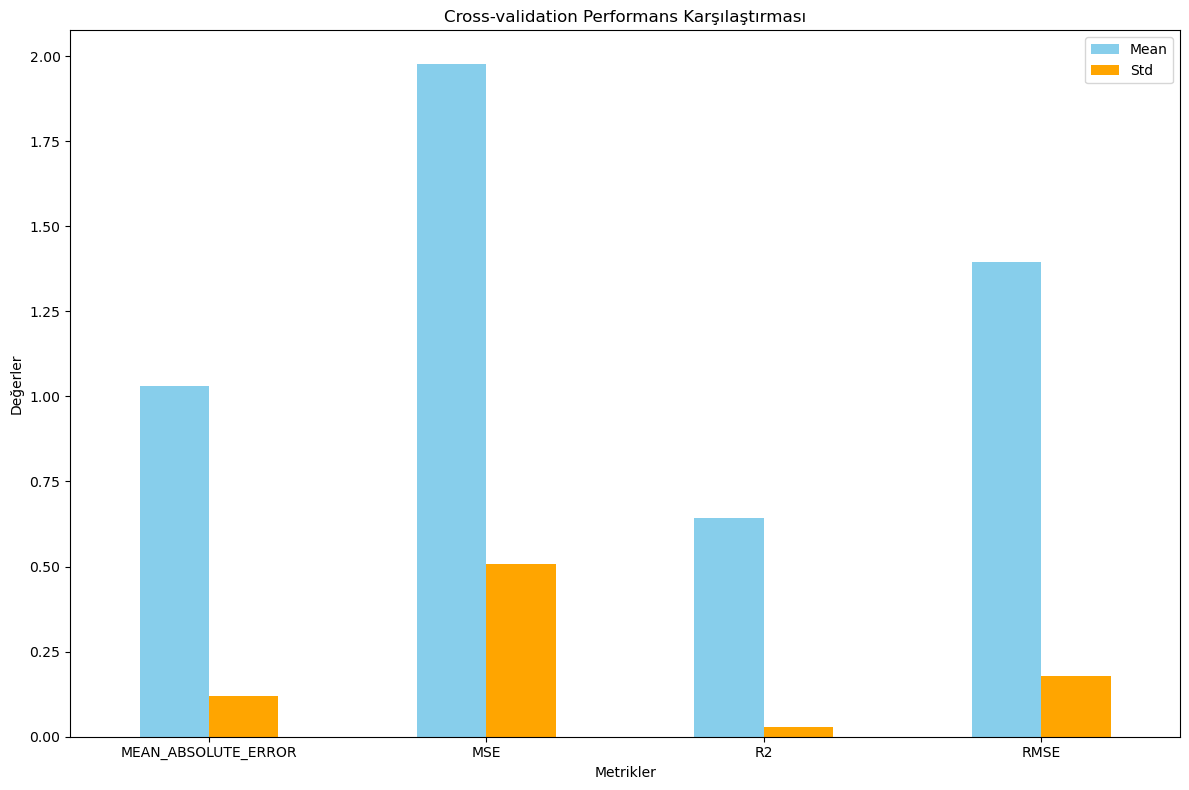

In [22]:
# Cross-validation sonuçlarını görselleştirme
plt.figure(figsize=(12, 8))
cv_results_df.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'orange', 'green', 'red'])
plt.title("Cross-validation Performans Karşılaştırması")
plt.ylabel("Değerler")
plt.xlabel("Metrikler")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()